### Probability distribution $P(Q)$ for $N=100$

First we have to read the simulation data, and use the maximum number of $T$ available (100 000 conformations).

In [1]:
# Library for reading simulation data
import numpy as np

# Parameters
b=3.0
N=100
T=100000    # The maximum number of conformations we have

# Coordinates arrays
x=np.zeros((T,N+1)); y=np.zeros((T,N+1)); z=np.zeros((T,N+1))

# Read simulation data
filename='simulation_FJC_b=%.1f_N=%d_T=%d.xyz'%(b,N,T)
with open(filename,'r') as f:
    for t in range(T):
        # First 2 lines unnecessary
        lines = f.readline()
        lines = f.readline()
        # Save coordinates and separate in x, y, z
        for i in range(N+1):
            lines = f.readline()
            coord = lines.split()
            x[t,i]=float(coord[1])
            y[t,i]=float(coord[2])
            z[t,i]=float(coord[3])

Compute $Q$,

In [2]:
# Initialize variables
Q=np.zeros((T,3))

# Compute them according its definition
for t in range(T):
    Q[t,0]=x[t,N]-x[t,0]
    Q[t,1]=y[t,N]-y[t,0]
    Q[t,2]=z[t,N]-z[t,0]
Q=np.sqrt(np.sum(Q**2,axis=1))

and compute its probability distribution,
$$P(Q) = 4 \pi Q^2 \left( \frac{3}{2 \pi N b^2} \right)^{3/2} \exp \left(-\frac{3 Q^2}{2 N b^2} \right) $$

In [3]:
# Compute
p_q = np.zeros(len(Q))
for i in range(len(Q)):
    p_q[i] = 4 * np.pi * Q[i] ** 2 * (3 / (2 * np.pi * N * b ** 2)) ** (3./2) * np.exp(-3 * Q[i] ** 2 / (2 * N * b ** 2))

and plot,

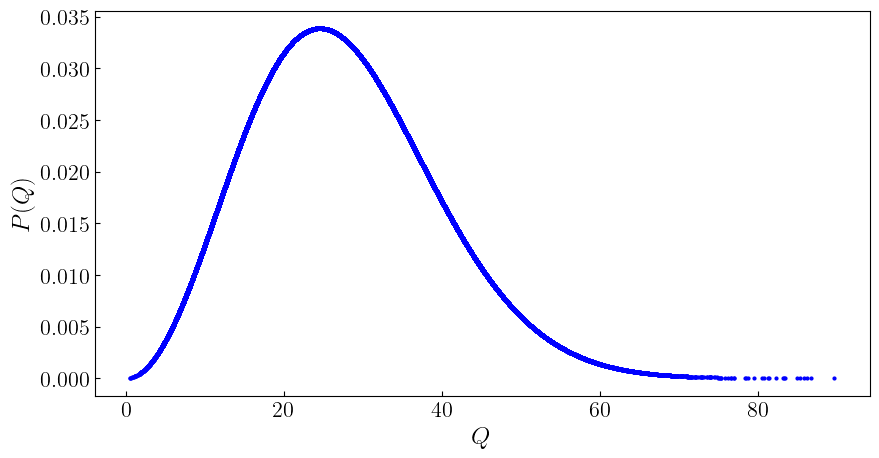

In [4]:
# Plot
import matplotlib.pyplot as plt

# LaTeX compiler
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.figure(figsize=(10,5))
plt.plot(Q, p_q, 'bo', markersize=2)
plt.xlabel(r'$Q$', fontsize=18)
plt.ylabel(r'$P(Q)$', fontsize=18)
plt.tick_params(axis='y', which='major', labelsize=16, direction='in')
plt.tick_params(axis='x', which='major', labelsize=16, direction='in')
plt.show()

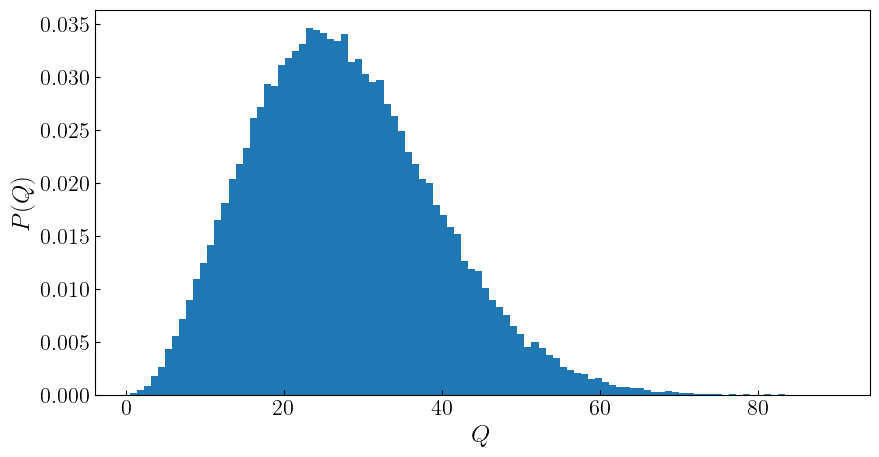

In [5]:
# Plot histogram of Q
plt.figure(figsize=(10,5))
plt.hist(Q, bins=100, density=True)
plt.xlabel(r'$Q$', fontsize=18)
plt.ylabel(r'$P(Q)$', fontsize=18)
plt.tick_params(axis='y', which='major', labelsize=16, direction='in')
plt.tick_params(axis='x', which='major', labelsize=16, direction='in')
plt.show()

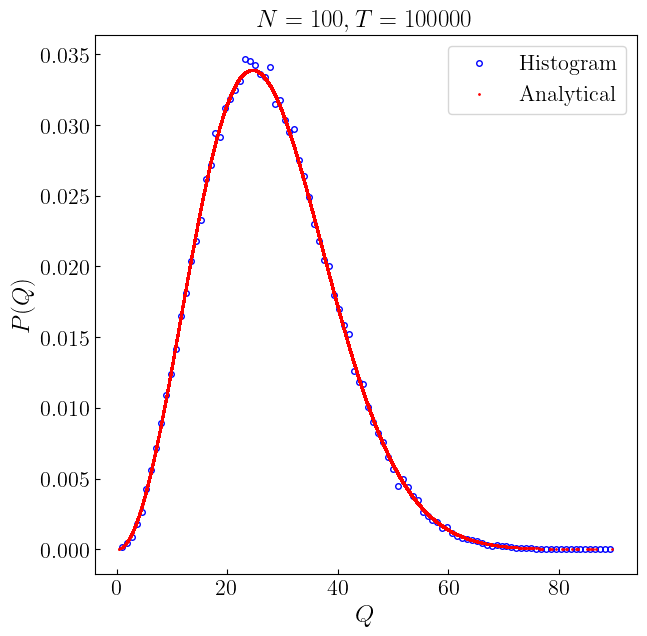

In [7]:
# Compute histogram of Q
nbins = 100
hist, bin_edges = np.histogram(Q, bins=nbins, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Plot
plt.figure(figsize=(7,7))
plt.title(r'$N=%d, T=%d$'%(N, T), fontsize=18)
plt.plot(bin_centers, hist, 'bo', mfc='none', markersize=4, label='Histogram')
plt.plot(Q, p_q, 'r.', markersize=2, label='Analytical')
plt.xlabel(r'$Q$', fontsize=18)
plt.ylabel(r'$P(Q)$', fontsize=18)
plt.tick_params(axis='y', which='major', labelsize=16, direction='in')
plt.tick_params(axis='x', which='major', labelsize=16, direction='in')
plt.legend(fontsize=16)
plt.show()